In [99]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.graph_objs as go
from plotly import tools
import plotly.plotly as py
from plotly.plotly import iplot

from textwrap import wrap
from datetime import date, timedelta


from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

In [100]:
col_names = ['video_id','title','channel_title','category_id','tags','views','likes','dislikes','comment_total','thumbnail_link','date']

video_data = pd.read_csv('USvideos.csv',usecols = col_names)

In [101]:
video_data.head(3)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09


In [102]:
video_data.isna().sum()

video_id          0
title             0
channel_title     0
category_id       0
tags              0
views             0
likes             0
dislikes          0
comment_total     0
thumbnail_link    0
date              0
dtype: int64

In [103]:
video_data['date'].unique()


array(['13.09', '14.09', '15.09', '16.09', '17.09', '18.09', '19.09',
       '20.09', '21.09', '22.09', '23.09', '24.09', '25.09', '26.09',
       '26.0903jeumSTSzc', '27.09', '28.09', '29.09', '30.09', '1.1',
       '2.1', '3.1', '4.1', '5.1', '6.1', '7.1', '8.1', '9.1', '100',
       '10.1', '11.1', '12.1', '13.1', '14.1', '15.1', '16.1', '17.1',
       '18.1', '19.1', '20.1', '21.1', '22.1'], dtype=object)

In [104]:
#Replacing incorrect date values

video_data.loc[video_data['date'] == '26.0903jeumSTSzc', 'date'] = '26.09'
video_data.loc[video_data['date'] == '100', 'date'] = '9.1'


In [96]:
video_data['date'].unique()

array(['13.09', '14.09', '15.09', '16.09', '17.09', '18.09', '19.09',
       '20.09', '21.09', '22.09', '23.09', '24.09', '25.09', '26.09',
       '27.09', '28.09', '29.09', '30.09', '1.1', '2.1', '3.1', '4.1',
       '5.1', '6.1', '7.1', '8.1', '9.1', '10.1', '11.1', '12.1', '13.1',
       '14.1', '15.1', '16.1', '17.1', '18.1', '19.1', '20.1', '21.1',
       '22.1'], dtype=object)

In [97]:
#Changing the format of date
video_data['date'] = video_data['date'].apply(lambda x: pd.to_datetime(str(x).replace('.','')+"2017",
                                                                     format='%d%m%Y'))
video_data['date'] = video_data['date'].dt.date

In [106]:
for i in video_data['date']:
    video_data['day'] = i.split('.')[0]
    video_data['month'] = i.split('.')[1]


In [107]:
video_data.head()

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date,day,month
0,XpVt6Z1Gjjo,1 YEAR OF VLOGGING -- HOW LOGAN PAUL CHANGED Y...,Logan Paul Vlogs,24,logan paul vlog|logan paul|logan|paul|olympics...,4394029,320053,5931,46245,https://i.ytimg.com/vi/XpVt6Z1Gjjo/default.jpg,13.09,22,1
1,K4wEI5zhHB0,iPhone X — Introducing iPhone X — Apple,Apple,28,Apple|iPhone 10|iPhone Ten|iPhone|Portrait Lig...,7860119,185853,26679,0,https://i.ytimg.com/vi/K4wEI5zhHB0/default.jpg,13.09,22,1
2,cLdxuaxaQwc,My Response,PewDiePie,22,[none],5845909,576597,39774,170708,https://i.ytimg.com/vi/cLdxuaxaQwc/default.jpg,13.09,22,1
3,WYYvHb03Eog,Apple iPhone X first look,The Verge,28,apple iphone x hands on|Apple iPhone X|iPhone ...,2642103,24975,4542,12829,https://i.ytimg.com/vi/WYYvHb03Eog/default.jpg,13.09,22,1
4,sjlHnJvXdQs,iPhone X (parody),jacksfilms,23,jacksfilms|parody|parodies|iphone|iphone x|iph...,1168130,96666,568,6666,https://i.ytimg.com/vi/sjlHnJvXdQs/default.jpg,13.09,22,1


In [108]:
video_data.shape

(7998, 13)

In [109]:
video_data.drop_duplicates()
video_data.shape

(7998, 13)

In [12]:
#Top Viewed videos
top_views = video_data.sort_values(['views'],ascending=False)
top_100_views = top_views.head(100)

Text(0.5, 1.0, 'MOST VIEWED CHANNELS')

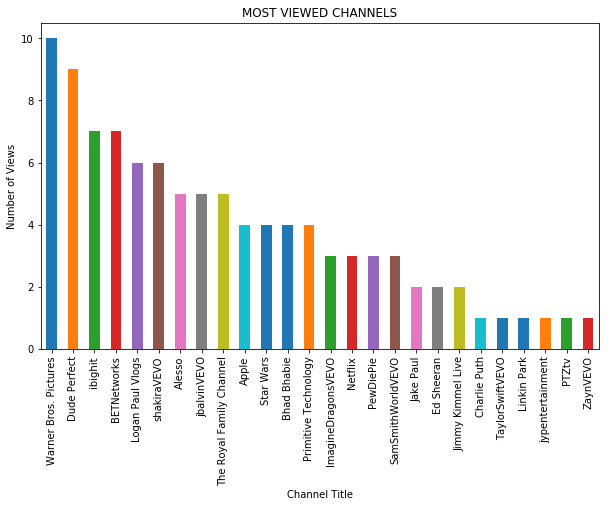

In [277]:
#Top Channel Titles based on views

top_100_views['channel_title'].value_counts().plot('bar',figsize=[10,6])
plt.xlabel('Channel Title')
plt.ylabel('Number of Views')
plt.title('MOST VIEWED CHANNELS')


C:\Users\monic\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



Text(0.5, 1.0, 'MOST VIEWED VIDEO CATEGORY')

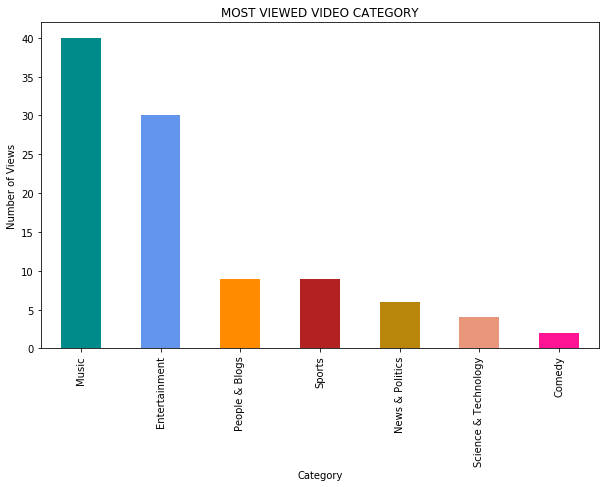

In [342]:
#Top Categories based on views

ax = top_100_views['category_id'].value_counts().plot('bar',figsize=[10,6],colors=['darkcyan','cornflowerblue', 'darkorange',
'firebrick', 'darkgoldenrod', 'darksalmon','deeppink'])
ax.set_xticklabels(['Music','Entertainment','People & Blogs','Sports','News & Politics','Science & Technology','Comedy'])
plt.xlabel('Category')
plt.ylabel('Number of Views')
plt.title('MOST VIEWED VIDEO CATEGORY')



In [13]:
#Top Liked videos 
top_likes = video_data.sort_values(['likes'],ascending=False)
top_100_likes = top_likes.head(100)

In [14]:
top_100_likes.head(3)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
1907,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,2017-09-22
1694,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,38013692,1950475,75294,713293,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,2017-09-21
1440,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,30424471,1762428,63990,582624,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,2017-09-20


Text(0.5, 1.0, 'MOST LIKED CHANNELS')

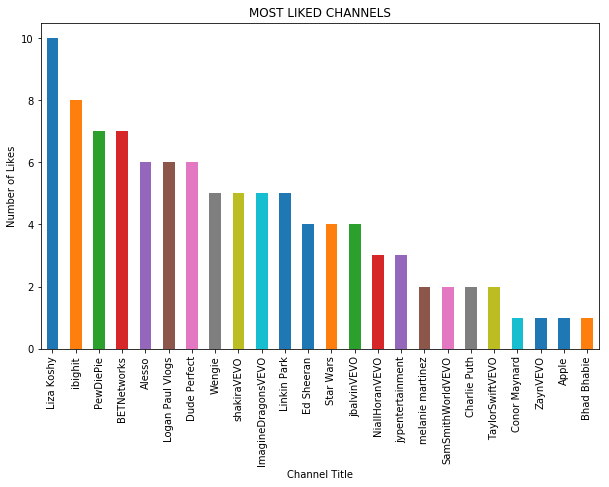

In [15]:
#Top Channel Titles based on views

top_100_likes['channel_title'].value_counts().plot('bar',figsize=[10,6])
plt.xlabel('Channel Title')
plt.ylabel('Number of Likes')
plt.title('MOST LIKED CHANNELS')


C:\Users\monic\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



Text(0.5, 1.0, 'MOST LIKED VIDEO CATEGORY')

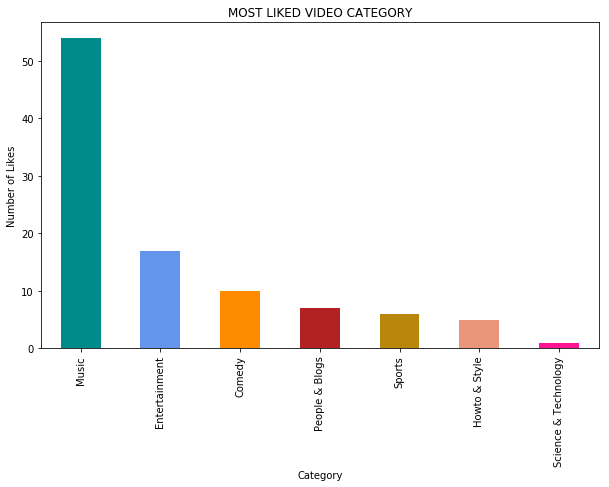

In [16]:
#Top Categories based on likes

ax = top_100_likes['category_id'].value_counts().plot('bar',figsize=[10,6], colors=['darkcyan','cornflowerblue', 'darkorange',
'firebrick', 'darkgoldenrod', 'darksalmon','deeppink'])
ax.set_xticklabels(['Music','Entertainment','Comedy', 'People & Blogs','Sports','Howto & Style','Science & Technology'])
plt.xlabel('Category')
plt.ylabel('Number of Likes')
plt.title('MOST LIKED VIDEO CATEGORY')


In [17]:
#Top Commented videos 
top_commented_videos = video_data.sort_values(['comment_total'],ascending=False)
top_100_commented_videos = top_commented_videos.head(100)

In [18]:
top_100_commented_videos.head(5)

,video_id,title,channel_title,category_id,tags,views,likes,dislikes,comment_total,thumbnail_link,date
1907,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,41500672,2010366,78076,736179,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,2017-09-22
1694,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,38013692,1950475,75294,713293,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,2017-09-21
1440,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,30424471,1762428,63990,582624,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,2017-09-20
1203,MBdVXkSdhwU,BTS (방탄소년단) 'DNA' Official MV,ibighit,10,BIGHIT|빅히트|방탄소년단|BTS|BANGTAN|방탄,20565649,1478119,46477,501435,https://i.ytimg.com/vi/MBdVXkSdhwU/default.jpg,2017-09-19
7141,LunHybOKIjU,Eminem Rips Donald Trump In BET Hip Hop Awards...,BETNetworks,24,BET|BET Networks|BET Music|Black Entertainment...,33191594,982842,184310,337603,https://i.ytimg.com/vi/LunHybOKIjU/default.jpg,2017-01-18


Text(0.5, 1.0, 'MOST COMMENTED CHANNELS')

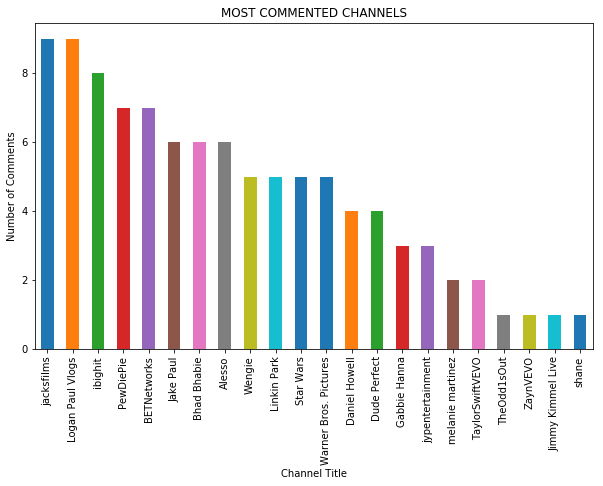

In [19]:
#Top Channel Titles based on comments

top_100_commented_videos['channel_title'].value_counts().plot('bar',figsize=[10,6])
plt.xlabel('Channel Title')
plt.ylabel('Number of Comments')
plt.title('MOST COMMENTED CHANNELS')


C:\Users\monic\Anaconda3\lib\site-packages\pandas\plotting\_core.py:194: UserWarning:

'colors' is being deprecated. Please use 'color'instead of 'colors'



Text(0.5, 1.0, 'MOST COMMENTED VIDEO CATEGORY')

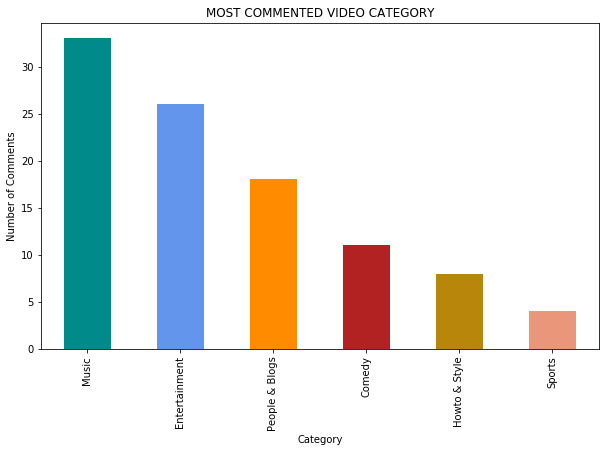

In [20]:
#Top Categories based on comments

ax = top_100_commented_videos['category_id'].value_counts().plot('bar',figsize=[10,6], colors=['darkcyan','cornflowerblue', 'darkorange',
'firebrick', 'darkgoldenrod', 'darksalmon','deeppink'])
ax.set_xticklabels(['Music','Entertainment','People & Blogs','Comedy','Howto & Style','Sports'])
plt.xlabel('Category')
plt.ylabel('Number of Comments')
plt.title('MOST COMMENTED VIDEO CATEGORY')


In [21]:
vid_check = video_data[['video_id', 'date']].copy().groupby('date', as_index = False).count()
vid_check.columns = ['Dates', 'Videos per date']
#print(vid_check.head())

#print(video_data['date'])
# dataframes for 
dates_per_id = video_data[['video_id', 'date']].groupby('video_id', as_index = False).count()
#print(dates_per_id)
dates_per_vids = dates_per_id.groupby('date', as_index = False).count()
#print(dates_per_vids)

dates_per_vids.columns = ['Quantity of dates per video', 'Quantity of videos in a date group']
max_days = max(dates_per_vids['Quantity of dates per video'].values)
#print(max_days)    



sept_13_id = video_data.loc[video_data['date'] == date(2017,9,13), 'video_id'].tolist()
print(sept_13_id)    #'2017-09-13'
sept_13 = video_data.loc[video_data['video_id'].isin(sept_13_id), ['video_id', 'date']]

sept_13 = sept_13.groupby('date', as_index=False).count()   
print(sept_13)    

['XpVt6Z1Gjjo', 'K4wEI5zhHB0', 'cLdxuaxaQwc', 'WYYvHb03Eog', 'sjlHnJvXdQs', 'cMKX2tE5Luk', '8wNr-NQImFg', '_HTXMhKWqnA', '_ANP3HR1jsM', 'zgLtEob6X-Q', 'Ayb_2qbZHm4', 'CsdzflTXBVQ', 'l864IBj7cgw', '4MkC65emkG4', 'vu_9muoxT50', '1L7JFN7tQLs', 'ZQK1F0wz6z4', 'T_PuZBdT2iM', 'w8fAellnPns', 'UCrBICYM0yM', 'Ifnaxi2LQg', 'B7YaMkCl3XA', '5ywKal6-anc', '4Yue-q9Jdbk', 'JhA1Wi9mrns', 'EVp4-qjWVJE', 'LcZ2AuvxXNA', 'MdzGZv3zQ-U', '1ZNZY-gd3K0', '2wxyDrfwlXQ', 'QBGaO89cBMI', 'ql0Op1VcELw', 'JO7X9ZPoAp8', 'GGm0FQ6i74U', 'a7Sf_H2cFdM', 'oDIDZ9EmQfA', 'zAtHxJvSczA', 'l_uNfGY3v8E', 'Rew50oYjRqA', 'WWexI9YiLSc', 'LDcm6twPEJA', 'O78Lpo4ctSE', 'qJJHhVf3_ZM', '3yoGE3v4A8w', 'zTjcPeb2Gwg', 'hQbeB0YXLhs', 'L3f7_y9UPh4', 'HwYK5Ay1YNQ', '6vGg-jJl30A', '9CILSvf1snQ', 'WoPtuVbaSKQ', '62cWuFjzOgs', 'NzRuDD0iYC0', 'eM_FR7I2Ttw', 'eoArC99zm1M', 'IMG0u0_cKNc', 'bAon04ZJhHE', 'LTnl36-0-zU', 'EmjMWi0MBXQ', 'c7ymY8QEB2g', 'Ez95rPffd8k', '08RHSZvixec', 'zAXn-v9RdXo', '_SRNenu07Lw', 'iXexmZm3_j8', 'GpAuCG6iUcA', 'eRDxDEhEg

In [22]:
#check how many days a video can be in trend and get some details on longest trending videos.
def quick_insight(df, country, color):
    
    # dataframes for videos per each date
    vid_check = video_data[['video_id', 'date']].copy().groupby('date', as_index = False).count()
    vid_check.columns = ['Dates', 'Videos per date']
    
    # dataframes for 
    dates_per_id = video_data[['video_id', 'date']].groupby('video_id', as_index = False).count()
    dates_per_vids = dates_per_id.groupby('date', as_index = False).count()
    dates_per_vids.columns = ['Quantity of dates per video', 'Quantity of videos in a date group']
    max_days = max(dates_per_vids['Quantity of dates per video'].values)
    
    # videos appeared in database as at 13 September 2017
    sept_13_id = video_data.loc[video_data['date'] == date(2017,9,13), 'video_id'].tolist()
    #'videos that were present from 13sept onwards till end i.e 19th sept
    sept_13 = video_data.loc[video_data['video_id'].isin(sept_13_id), ['video_id', 'date']]
    sept_13 = sept_13.groupby('date', as_index=False).count()   
    
    # combined plot
    fig = plt.figure(figsize=(14, 10))
    gs = gridspec.GridSpec(3, 2, width_ratios=[1,1], height_ratios = [1,0.1,1])
     
    # plotting buckets of videos by quantity of trending dates
    ax2 = plt.subplot(gs[0,0])
    ax2 = sns.barplot(x="Quantity of dates per video",
                      y="Quantity of videos in a date group",
                      data=dates_per_vids, color='navy')
    ax2.set_ylabel('Quantity of videos ', fontsize=12)
    ax2.set_xlabel('Trending days', fontsize=12)
    title = 'Buckets of videos by quantity of trending dates'
    ax2.set_title(title, fontsize=15)
    
    # plotting story of videos that appeared on September 13
    ax3 = plt.subplot(gs[0,1])    
    ax3 = sns.barplot(x='date', y="video_id", data=sept_13, color=color, alpha = 0.7, palette='BuGn_r')
    ax3.set_ylabel('Quantity of videos per date', fontsize=12)
    ax3.set_xticklabels(sept_13['date'], rotation=45)
    ax3.set_xlabel('')
    title = 'Videos started on 13 September 2017'
    ax3.set_title(title, fontsize=15)
    
    plt.show()

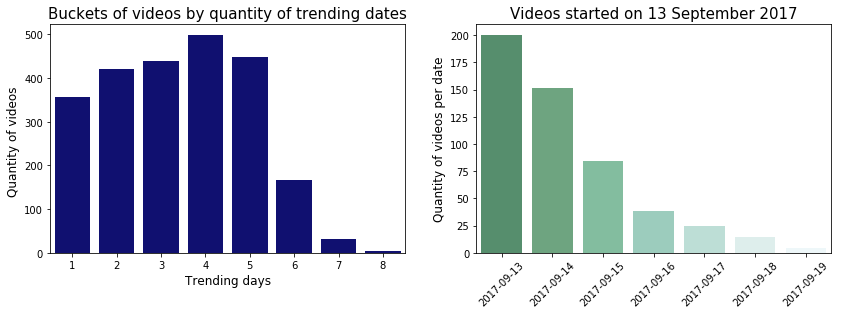

In [23]:
quick_insight(video_data, 'USA', 'cyan')


             views     likes  dislikes
views     1.000000  0.832854  0.541900
likes     0.832854  1.000000  0.497287
dislikes  0.541900  0.497287  1.000000


Text(0.5, 1.0, 'Correlation matrix')

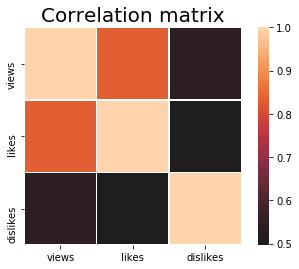

In [24]:
import seaborn as sns
corr_us = video_data.loc[:,['views', 'likes', 'dislikes']].corr()
print(corr_us)

ax1 = sns.heatmap(corr_us, vmax=1, center=0.5, square=True, linewidths=.5) 
ax1.set_title('Correlation matrix', fontsize=20)

In [327]:
def vldc_plot(df_init, country):
    df = df_init[['date','views', 'likes', 'dislikes']].groupby('date', as_index = False).sum()
    df[['views','likes', 'dislikes']] = df[['views', 'likes', 'dislikes']].apply(lambda x: x/1000000)
    fig = plt.figure(figsize=(12, 5))
    gs = gridspec.GridSpec(2, 2, width_ratios=[1,1])

    ax1 = plt.subplot(gs[0,0])
    ax1.plot(df['date'], df['views'])
    ax1.set_xticklabels("")
    ax1.set_title('Views, mln', fontsize=20)

    #ax2 = plt.subplot(gs[0,1])
    #ax2.plot(df['date'], df['comments'])
    #ax2.set_xticklabels("")
    #ax2.set_title('Comments, mln', fontsize=20)

    ax3 = plt.subplot(gs[1,0])
    ax3.plot(df['date'], df['likes'])
    ax3.set_xticks(df['date'].values)
    ax3.set_xticklabels(df['date'], rotation=45)
    ax3.set_title('Likes, mln', fontsize=20)

    ax4 = plt.subplot(gs[1,1])
    ax4.plot(df['date'], df['dislikes'])
    ax4.set_xticks(df['date'].values)
    ax4.set_xticklabels(df['date'], rotation=45)
    ax4.set_title('Dislikes, mln', fontsize=20)

    plt.suptitle('{} segment'.format(country), fontsize=22)

    plt.show()

In [117]:
#df = pd.DataFrame(np.random.randn(100, 4), columns=['views','likes','dislikes','comment_total'])
#df[df.apply(lambda x: np.abs(x - x.mean()) / x.std() < 3).all(axis=1)]


In [110]:
#Creating X,y and splitting the dataset into training and testing

X, y = video_data[['views','dislikes','comment_total','day','month']].values, video_data['likes']

X_train, X_test, y_train, y_test =\
    train_test_split(X, y, 
                     test_size=0.3, 
                     random_state=0)



In [111]:
#Scaling the features

from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.transform(X_test)

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.

C:\Users\monic\Anaconda3\lib\site-packages\sklearn\utils\validation.py:595: DataConversionWarning:

Data with input dtype object was converted to float64 by StandardScaler.



In [49]:
#Train decision tree model

from sklearn.tree import DecisionTreeClassifier

tree = DecisionTreeClassifier(random_state=0,max_depth=50)
tree.fit(X_train_std, y_train)

print("Decision Tree")
print("Accuracy on training set: {:.3f}".format(tree.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(tree.score(X_test_std, y_test)))

y_pred_tree = tree.predict(X_test_std)
print("Predicted value: ",y_pred_tree)

#precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_tree, average='micro')
#print("Precision, Recall and fscore:",precision, recall, fscore,)

Decision Tree
Accuracy on training set: 0.702
Accuracy on test set: 0.021
Predicted value:  [  5223   9213    637 ... 114297   2045   5223]


In [113]:
#Train random forest model

forest = RandomForestClassifier(n_estimators=5,random_state=0)
forest.fit(X_train_std, y_train)

print("Random Forest")
print("Accuracy on training set: {:.3f}".format(forest.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(forest.score(X_test_std, y_test)))

y_pred_forest = forest.predict(X_test_std)
print("Predicted value: ",y_pred_forest)

#precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_forest, average='micro')
#print("Precision, Recall and fscore:",precision, recall, fscore,)

Random Forest
Accuracy on training set: 0.912
Accuracy on test set: 0.020
Predicted value:  [ 10449   3311   4005 ... 118942   5823  43384]


In [112]:
from sklearn import linear_model

regr = linear_model.LinearRegression()
regr.fit(X_train_std, y_train)

print("Regression")
print("Accuracy on training set: {:.3f}".format(regr.score(X_train_std, y_train)))
print("Accuracy on test set: {:.3f}".format(regr.score(X_test_std, y_test)))

y_pred_regression = regr.predict(X_test_std)
print("Predicted value: ",y_pred_regression)

#precision, recall, fscore, support = precision_recall_fscore_support(y_test, y_pred_forest, average='micro')
#print("Precision, Recall and fscore:",precision, recall, fscore,)


Regression
Accuracy on training set: 0.828
Accuracy on test set: 0.742
Predicted value:  [70066.37184219 14069.18556595  7233.83405711 ... 98183.42864867
 25214.56751035 90167.60723972]


In [70]:
#Plot the graph for feature selection for decision tree and random forest
def plot_feature_importances_mydata(model):
    n_features = X_train_std.shape[1]
    print(n_features)
    plt.figure(figsize=(8,6))
    plt.barh(range(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), ['views','dislikes','comment_total'])
    plt.title("Feature Selection")
    plt.xlabel("Variable importance")
    plt.ylabel("Independent Variable")
    plt.show()


3


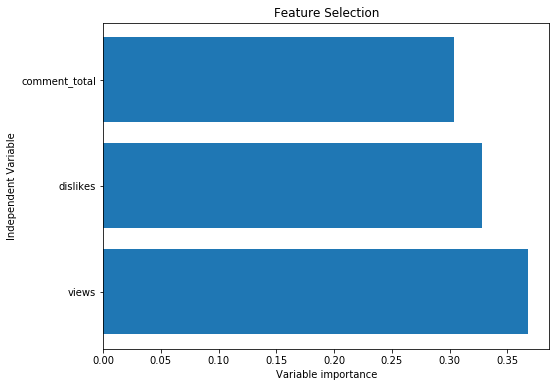

In [71]:
plot_feature_importances_mydata(tree)


3


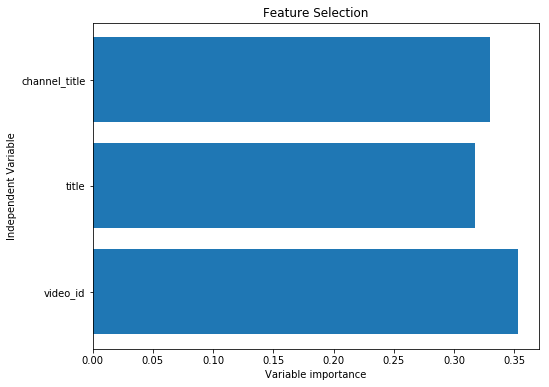

In [63]:
plot_feature_importances_mydata(forest)
